## Context

We scrapped the data from the first 20 pages of listings of private rooms in Lisbon from Uniplaces.

We have the data in a dataframe. However, the dataframe contains a high number of variables.
We will clean it a bit and at the same time create an abridged version (dropping variables that don't seem very interesting), resulting in two dataframes.

Import libraries

In [1582]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

## First impressions

In [1583]:
df = pd.read_csv("scraped_data/all_scraping.csv", index_col=0)

In [1584]:
print(df.shape)
df.head(2)

(959, 190)


,title,photo_url,n_thumbnails,rating,n_reviews,type,n_people,n_bedrooms,n_bathrooms,price,priceCurrency,availabilityStarts,availability,url,Occasional overnight guests,Pets,Smoking,1 Double bed,Wardrobe,Desk,Chairs,Towels,Bed linen,Window,Sofa,Sofa bed,Balcony,Contract,Bills,Cancellation policy,Security deposit,Extra per tenant,Cleaning Frequency,Minimum stay,neighboorhood,n_Bathrooms,n_Kitchens,n_Living rooms,Wi-Fi,Cable Tv,Central heating,Air conditioning,Outdoor area,Towels & bed linen,Elevator,Accessibility,Toilet,Sink,Shower,Bathtub,Fridge,Freezer,Stove,Oven,Microwave,Washing machine,Dishes & cutlery,Pots & pans,Coffee table,Table,Tv,Chest of drawers,Door lock,Dryer,Dishwasher,1 Single bed,Admin fee,Floor plan - 100 m2,"Female, 26-30 years old",Professional,Lives with family,Has pets,Bedroom area 8m 2,Short term penalty,Floor plan - 20 m2,Postgraduates,Floor plan - 110 m2,Bedroom area 10m 2,"Female, 40+ years old",Floor plan - 220 m2,Floor plan - 25 m2,Private bathroom,Bathroom,Bedroom area 1m 2,Floor plan - 105 m2,Floor plan - 5 m2,Floor plan - 4 m2,Floor plan - 13 m2,2 Single beds,Full-time employees,Floor plan - 8 m2,Floor plan - 15 m2,Bedroom area 25m 2,Female only,Bedroom area 9m 2,n_WCs,Floor plan - 10 m2,Undergraduates,Floor plan - 240 m2,Bedroom area 20m 2,Bedroom area 26m 2,Floor plan - 12 m2,Bedroom area 14m 2,n_Dining Rooms,Floor plan - 90 m2,Bedroom area 13m 2,Bedroom area 24m 2,Bedroom area 12m 2,Floor plan - 82 m2,Floor plan - 6 m2,Bedroom area 21m 2,Bedroom area 11m 2,Floor plan - 9 m2,Floor plan - 135 m2,Floor plan - 150 m2,Domestic students,Floor plan - 325 m2,Bedroom area 19m 2,The landlord didn’t provide any amenities for the Bathroom.,Floor plan - 280 m2,Floor plan - 40 m2,Bedroom area 18m 2,Floor plan - 160 m2,Floor plan - 14 m2,Floor plan - 18 m2,Floor plan - 85 m2,Male only,Requirements,n_Bathroom No photoss,Bedroom area 17m 2,Bedroom area 15m 2,Floor plan - 165 m2,Floor plan - 16 m2,International students,Floor plan - 400 m2,"Female, 18-25 years old",Undergraduate student,Floor plan - 126 m2,Floor plan - 30 m2,"Male, 31-40 years old",Floor plan - 75 m2,Floor plan - 120 m2,"Male, 40+ years old",Floor plan - 76 m2,Floor plan - 180 m2,Floor plan - 48 m2,Bedroom area 16m 2,n_Living room No photoss,Floor plan - 50 m2,Floor plan - 70 m2,Bedroom area 3m 2,Floor plan - 104 m2,Floor plan - 210 m2,Enclosed balcony,Floor plan - 98 m2,Female,Floor plan - 170 m2,Bedroom area 7m 2,Floor plan - 7 m2,Bedroom area 22m 2,Floor plan - 96 m2,Floor plan - 140 m2,Floor plan - 55 m2,Floor plan - 95 m2,Bedroom area 6m 2,Floor plan - 200 m2,Floor plan - 60 m2,Floor plan - 11 m2,n_WC No photoss,Floor plan - 130 m2,Bedroom area 32m 2,"Female, 31-40 years old",Male,Floor plan - 350 m2,Floor plan - 35 m2,2 Double beds,Floor plan - 190 m2,Postgraduate student,Floor plan - 21 m2,Bedroom area 30m 2,"Male, 18-25 years old",4 Single beds,Floor plan - 65 m2,Floor plan - 17 m2,Holding deposit,Floor plan - 300 m2,3 Single beds,Floor plan - 250 m2,Floor plan - 106 m2,Floor plan - 2 m2
0,Huge double bedroom in an elegant 5-bedroom fl...,https://cdn-static-new.uniplaces.com/property-...,31,0,0,Double bedroom,Up to 2 people,5-bedroom apartment,3 bathrooms,750,EUR,Thu Jan 13 2022 00:00:00 GMT+0000,OnlineOnly,https://www.uniplaces.com/accommodation/lisbon...,True,False,False,True,True,True,1,True,True,2,1,0,1,Fortnightly,Included,Moderate,Equal to first rent,€200/month,None,27 nights,Marquês de Pombal,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3,3,2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [1585]:
cols = df.columns

## Columns with "plan" or "area"
There seems to be a high number of columns with the words "plan" or "area". 

In [1586]:
def get_n_cols (cols, word):
    new_cols = [col for col in cols if word in col.lower()]
    print('There are {} columns with the word "{}".'.format(len(new_cols), word))
    return new_cols

In [1587]:
cols_plan = get_n_cols (cols, "plan")
cols_area = get_n_cols (cols, "area")

There are 62 columns with the word "plan".
There are 25 columns with the word "area".


### Columns with "plan"

We want to create a "Floor plan m2" column and save all the values from these columns.
Ideally, there would only be a True, 1 or 1.0 value per row.
We also need to see what their names look like.

In [1588]:
print(cols_plan)

['Floor plan - 100 m2', 'Floor plan - 20 m2', 'Floor plan - 110 m2', 'Floor plan - 220 m2', 'Floor plan - 25 m2', 'Floor plan - 105 m2', 'Floor plan - 5 m2', 'Floor plan - 4 m2', 'Floor plan - 13 m2', 'Floor plan - 8 m2', 'Floor plan - 15 m2', 'Floor plan - 10 m2', 'Floor plan - 240 m2', 'Floor plan - 12 m2', 'Floor plan - 90 m2', 'Floor plan - 82 m2', 'Floor plan - 6 m2', 'Floor plan - 9 m2', 'Floor plan - 135 m2', 'Floor plan - 150 m2', 'Floor plan - 325 m2', 'Floor plan - 280 m2', 'Floor plan - 40 m2', 'Floor plan - 160 m2', 'Floor plan - 14 m2', 'Floor plan - 18 m2', 'Floor plan - 85 m2', 'Floor plan - 165 m2', 'Floor plan - 16 m2', 'Floor plan - 400 m2', 'Floor plan - 126 m2', 'Floor plan - 30 m2', 'Floor plan - 75 m2', 'Floor plan - 120 m2', 'Floor plan - 76 m2', 'Floor plan - 180 m2', 'Floor plan - 48 m2', 'Floor plan - 50 m2', 'Floor plan - 70 m2', 'Floor plan - 104 m2', 'Floor plan - 210 m2', 'Floor plan - 98 m2', 'Floor plan - 170 m2', 'Floor plan - 7 m2', 'Floor plan - 96 m2

In [1589]:
new_cols = cols_plan.copy()
print("{} rows have more than one row with a True, 1 or 1.0 value.".
      format(len(df[new_cols].sum(axis=1)[df[new_cols].sum(axis=1) > 1])))

157 rows have more than one row with a True, 1 or 1.0 value.


It seems that is not the case. We will save the highest value.
For that, we will:
1. Take the number part from the column names
2. Fill the rows with True, 1 or 1.0 value with these numbers.
3. Merge columns, keeping the largest number of each row.

Protip: x=1, x=1.0 and x=True, return True in x==True.

In [1590]:
def get_number (df, cols, split1):
    for col in cols:
        number = [int(i) for i in col.split(split1)[0].split() if i.isdigit()][0]
        df[col] = np.where(df[col] == True, number, df[col]) 
    return df[cols]

def delete_smaller (df, cols):
    maxs = df[cols].max(axis=1)
    for ind in df[cols].index:
        df.loc[ind,cols] = np.where(df.loc[ind,cols] == maxs[ind], df.loc[ind,cols], None)
    return df[cols]   

def merge_cols (df, cols, col_name):
    df[col_name] = df[cols].max(axis=1)
    df = df.drop(cols, axis=1)
    return df

In [1591]:
df[new_cols] = get_number (df, new_cols, " m2")
df[new_cols] = delete_smaller (df, new_cols)
df = merge_cols (df, new_cols, "Floor_plan_m2")

### Columns with "area"

In [1592]:
new_cols = cols_area.copy()
print("{} rows have more than one row with a True, 1 or 1.0 value.".
      format(len(df[new_cols].sum(axis=1)[df[new_cols].sum(axis=1) > 1])))

34 rows have more than one row with a True, 1 or 1.0 value.


In [1593]:
print(cols_area)

['Outdoor area', 'Bedroom area 8m 2', 'Bedroom area 10m 2', 'Bedroom area 1m 2', 'Bedroom area 25m 2', 'Bedroom area 9m 2', 'Bedroom area 20m 2', 'Bedroom area 26m 2', 'Bedroom area 14m 2', 'Bedroom area 13m 2', 'Bedroom area 24m 2', 'Bedroom area 12m 2', 'Bedroom area 21m 2', 'Bedroom area 11m 2', 'Bedroom area 19m 2', 'Bedroom area 18m 2', 'Bedroom area 17m 2', 'Bedroom area 15m 2', 'Bedroom area 16m 2', 'Bedroom area 3m 2', 'Bedroom area 7m 2', 'Bedroom area 22m 2', 'Bedroom area 6m 2', 'Bedroom area 32m 2', 'Bedroom area 30m 2']


We will need to merge the bedroom area columns, but leave the Outdoor area column alone.

In [1594]:
new_cols.remove('Outdoor area')

In [1595]:
df[new_cols] = get_number (df, new_cols, "m 2")
df[new_cols] = delete_smaller (df, new_cols)
df = merge_cols (df, new_cols, "Bedroom_area_m2")

## Solving header data scraping issues

During the scrapping it was assumed that the header of listings all had the format. It seems that was not case.

The header data is in columns type, n_people, n_bedrooms, n_bathrooms.

In [1596]:
df["n_bathrooms"].value_counts()

2 bathrooms               469
1 Bathroom                242
3 bathrooms               126
5-bedroom apartment        20
5 bathrooms                16
4 bathrooms                13
7-bedroom apartment        13
2-bedroom apartment        10
4-bedroom apartment         9
6-bedroom apartment         7
3-bedroom apartment         7
9-bedroom apartment         6
6 bathrooms                 6
Apartment in hostel         5
Apartment in residence      5
6-bedroom house             2
4-bedroom house             1
10-bedroom apartment        1
8-bedroom apartment         1
Name: n_bathrooms, dtype: int64

In [1597]:
df["type"].value_counts()

Single bedroom      467
Double bedroom      413
Twin bedroom         77
Multiple bedroom      2
Name: type, dtype: int64

In [1598]:
df["n_people"].value_counts()

1 person            586
Up to 2 people      285
Private bathroom     87
Up to 3 people        1
Name: n_people, dtype: int64

In [1599]:
df["n_bedrooms"].value_counts()

7-bedroom apartment       185
5-bedroom apartment       120
4-bedroom apartment       108
3-bedroom apartment       102
6-bedroom apartment        89
8-bedroom apartment        56
1 person                   48
9-bedroom apartment        46
Up to 2 people             37
Apartment in residence     36
10-bedroom apartment       36
2-bedroom apartment        32
20-bedroom apartment       16
Apartment in hostel        13
6-bedroom house             9
11-bedroom apartment        8
Residence                   4
3-bedroom house             3
4-bedroom house             3
5-bedroom house             3
Up to 3 people              2
2-bedroom house             1
1-bedroom apartment         1
7-bedroom house             1
Name: n_bedrooms, dtype: int64

**We will apply the following:**
1. If it has the word bathroom, belongs in n_bathrooms
2. If it has the word bedroom, belongs in n_bedrooms
3. If it has the words people or person, belongs in n_people

This means dropping information like residence or hostel, which is fine because most listings do not include this information.

Protip: Go back to the previous cells anytime to check if you are moving in the correct path.

##### Move information to the correct columns

In [1600]:
new_df = df.copy()

ind = new_df[new_df["n_people"].str.contains("bathroom", case=False) == True].index
df.loc[ind, "n_bathrooms"] = new_df.loc[ind, "n_people"]

ind = new_df[new_df["n_bathrooms"].str.contains("bedroom", case=False) == True].index
df.loc[ind, "n_bedrooms"] = new_df.loc[ind, "n_bathrooms"]

ind = new_df[new_df["n_bedrooms"].str.contains("person", case=False) == True].index
df.loc[ind, "n_people"] = new_df.loc[ind, "n_bedrooms"]

ind = new_df[new_df["n_bedrooms"].str.contains("people", case=False) == True].index
df.loc[ind, "n_people"] = new_df.loc[ind, "n_bedrooms"]

##### Remove incorrect information

In [1601]:
for col, word in zip(["n_bathrooms", "n_bedrooms", "n_people"], 
                     ["bathroom", "bedroom", ["people", "person"]]): 
    if type(word) != list:
        df[col] = np.where(df[col].str.contains(word, case=False), df[col], None)
    else:
        df[col] = np.where((df[col].str.contains(word[0], case=False) |
                            df[col].str.contains(word[1], case=False)),
                           df[col], None)

##### Format data

In [1602]:
df["has_private_bathroom"] = np.where(df["n_bathrooms"] == "Private bathroom", 1, 0)
df["n_bathrooms"] = np.where(df["n_bathrooms"] == "Private bathroom", None, df["n_bathrooms"])

for col in ["n_bathrooms", "n_people", "n_bedrooms"]:
    df[col] = df[col][df[col].notnull() == True].str.extract('(\d+)')

## Columns with "n_" 

In [1603]:
new_cols = get_n_cols (cols, "n_")
print(new_cols)

There are 13 columns with the word "n_".
['n_thumbnails', 'n_reviews', 'n_people', 'n_bedrooms', 'n_bathrooms', 'n_Bathrooms', 'n_Kitchens', 'n_Living rooms', 'n_WCs', 'n_Dining Rooms', 'n_Bathroom No photoss', 'n_Living room No photoss', 'n_WC No photoss']


In [1604]:
df['n_thumbnails'].unique()

array(['31', '6', '15', '18', '20', '10', '16', '13', '7', '19', '24',
       '11', '8', '9', '5', '29', '17', '33', '28', '14', '40', '12',
       '21', '27', '22', '32', '26', '25', '47', '2 or less', '23', '46',
       '42', '35', '34', '37', '30', '41', '36', '57', '43', '45', '38',
       '48', '39', '51', '50', '52', '54'], dtype=object)

In [1605]:
df['n_reviews'].unique()[:4]

array(['0',
       '<selenium.webdriver.remote.webelement.WebElement (session="5c9b2c8b2d9aaf92b979720717073b45", element="fd706b66-2742-4960-81f1-511f48642d76")>',
       '<selenium.webdriver.remote.webelement.WebElement (session="5c9b2c8b2d9aaf92b979720717073b45", element="dc67e822-1b9c-4287-8e3f-8568141c92a7")>',
       '<selenium.webdriver.remote.webelement.WebElement (session="5c9b2c8b2d9aaf92b979720717073b45", element="961e4a72-1548-46e5-bfff-f640dbddb35d")>'],
      dtype=object)

"2 or less" will be changed to 2. The other was a distraction. I forgot to take the text, instead of the element.

In [1606]:
df = df.drop('n_reviews', axis=1)
df['n_thumbnails'] = np.where(df['n_thumbnails'] == '2 or less', 2, df['n_thumbnails'])

We want to join the bathrooms columns, bedrooms columns,...

In [1607]:
cols_bedroom = get_n_cols (new_cols, "bedroom")
cols_bathroom = get_n_cols (new_cols, "bathroom")
cols_kitchen = get_n_cols (new_cols, "kitchen")
cols_living = get_n_cols (new_cols, "living")
cols_dining = get_n_cols (new_cols, "dining")
cols_wc = get_n_cols (new_cols, "wc")

There are 1 columns with the word "bedroom".
There are 3 columns with the word "bathroom".
There are 1 columns with the word "kitchen".
There are 2 columns with the word "living".
There are 1 columns with the word "dining".
There are 2 columns with the word "wc".


### Columns with "bathroom"

We will put the maximum value of these columns in n_bathrooms column.

We need to check if either of these are of type object (string in this case). We can also check nulls at the same time.

In [1608]:
df[cols_bathroom].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 958
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   n_bathrooms            872 non-null    object 
 1   n_Bathrooms            919 non-null    float64
 2   n_Bathroom No photoss  27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 62.3+ KB


#### Change type, get max and drop cols

In [1609]:
def drop_redundant (df, cols, col_name):
    for col in cols:
        df[col] = pd.to_numeric(df[col])
    df[col_name] = df[cols].max(axis=1)
    
    if col_name in cols:
        cols.remove(col_name)
        
    df = df.drop(cols, axis=1)
    return df

In [1610]:
df = drop_redundant (df, cols_bathroom, "n_bathrooms")

Lets see if there are any other columns with bathroom.

In [1611]:
tmp_cols = get_n_cols(df.columns, "bathroom")
df[tmp_cols].info()

There are 5 columns with the word "bathroom".
<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 958
Data columns (total 5 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   n_bathrooms                                                  930 non-null    float64
 1   Private bathroom                                             87 non-null     object 
 2   Bathroom                                                     87 non-null     object 
 3   The landlord didn’t provide any amenities for the Bathroom.  7 non-null      object 
 4   has_private_bathroom                                         959 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 77.2+ KB


In [1612]:
print(df["Private bathroom"].equals(df["Bathroom"]))

True


It looks like Private bathroom and Bathroom are identical (I made a mistake during the scraping).
Let's drop Bathroom, Private bathroom and any column about ammenities.

In [1613]:
tmp = ["Bathroom", "Private bathroom"] + [col for col in tmp_cols if "amenit" in col.lower()]
df = df.drop(tmp, axis=1)

### Columns with "living"

In [1614]:
df = drop_redundant (df, cols_living, "n_living_rooms")
tmp_cols = get_n_cols(df.columns, "living")
df[tmp_cols].info()

There are 1 columns with the word "living".
<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 958
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   n_living_rooms  402 non-null    float64
dtypes: float64(1)
memory usage: 47.3 KB


### Columns with "wc"

In [1615]:
df = drop_redundant (df, cols_wc, "n_wcs")
tmp_cols = get_n_cols(df.columns, "wc")
df[tmp_cols].info()

There are 1 columns with the word "wc".
<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 958
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n_wcs   54 non-null     float64
dtypes: float64(1)
memory usage: 47.3 KB


## Columns with "single" 

In [1616]:
cols_single = get_n_cols (cols, "single")
df[cols_single].info()

There are 4 columns with the word "single".
<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 958
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   1 Single bed   473 non-null    object
 1   2 Single beds  69 non-null     object
 2   4 Single beds  1 non-null      object
 3   3 Single beds  1 non-null      object
dtypes: object(4)
memory usage: 69.8+ KB


In [1617]:
for col in cols_single:
    number = [int(i) for i in col.split() if i.isdigit()]
    df[col] = np.where(df[col].notnull(), number[0], 0)
    
df = drop_redundant (df, cols_single, "n_single_beds")

In [1618]:
## Columns with "double" 
cols_double = get_n_cols (cols, "double")
df[cols_double].info()

There are 2 columns with the word "double".
<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 958
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   1 Double bed   419 non-null    object
 1   2 Double beds  2 non-null      object
dtypes: object(2)
memory usage: 54.8+ KB


In [1619]:
for col in cols_double:
    number = [int(i) for i in col.split() if i.isdigit()]
    df[col] = np.where(df[col].notnull(), number[0], 0)
    
df = drop_redundant (df, cols_double, "n_double_beds")

## Columns with "student" 

Several columns have the word student.

In [1620]:
cols_student = get_n_cols (cols, "student")

df[cols_student].info()

There are 4 columns with the word "student".
<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 958
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Domestic students       21 non-null     object
 1   International students  6 non-null      object
 2   Undergraduate student   6 non-null      object
 3   Postgraduate student    8 non-null      object
dtypes: object(4)
memory usage: 69.8+ KB


If it has the "students" then is regarding the tenants. We will include them as cols_tenant_restrictions for a future "has_tenant_restrictions".

If it has "student" is regarding landlord. For the landlord, we just want to save that it has landlord. We will deal with these later.

In [1621]:
cols_landlord = ["Undergraduate student", "Postgraduate student"]
cols_tenant_restrictions = ["Domestic students", "International students"]

In [1622]:
print(df[cols_tenant_restrictions[0]].value_counts())
print(df[cols_tenant_restrictions[1]].value_counts())

False    21
Name: Domestic students, dtype: int64
False    6
Name: International students, dtype: int64


## Columns with "male" 

This will return columns with the substring "male" (which also includes "female")

In [1623]:
cols_male = get_n_cols (cols, "male")

There are 11 columns with the word "male".


In [1624]:
df[cols_male].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 958
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Female, 26-30 years old  8 non-null      object
 1   Female, 40+ years old    50 non-null     object
 2   Female only              86 non-null     object
 3   Male only                9 non-null      object
 4   Female, 18-25 years old  6 non-null      object
 5   Male, 31-40 years old    12 non-null     object
 6   Male, 40+ years old      12 non-null     object
 7   Female                   2 non-null      object
 8   Female, 31-40 years old  7 non-null      object
 9   Male                     4 non-null      object
 10  Male, 18-25 years old    1 non-null      object
dtypes: object(11)
memory usage: 122.2+ KB


The columns with the word "only" refer to the tenant, the others are regarding the landlord.

We will create new columns with names "tenant_male" and "tenant_female".
We will keep ["Female only", "Male only"] for now

In [1625]:
cols_landlord = cols_landlord + [col for col in cols_male if "only" not in col]

cols_tenant_restrictions = cols_tenant_restrictions + ["Female only", "Male only"]

#### Columns of landlord

There a few more columns regarding the landlord: ["Professional", "Lives with family", "Has pets"].
We will add the prefix "landlord_" to the landlord columns, change nulls to 0, and create a new column named "landlord_lives_here".

We will also drop from the abridged version all the columns related to the landlord except "landlord_lives_here".

In [1626]:
def group_cols (df, cols, prefix, col_name):
    
    df[col_name] = df[cols].max(axis=1)
        
    with_prefix = dict([(x, prefix + x) for x in cols])
    df = df.rename(columns = with_prefix)
    
    return df, list(with_prefix.values())

In [1627]:
cols_landlord = cols_landlord + ["Professional", "Lives with family", "Has pets"]
df, cols_landlord = group_cols (df, cols_landlord, "landlord_", "landlord_lives_here")

for col in cols_landlord:
    df[col] = np.where(df[col].isnull(), 0, df[col])

#### Columns of tennant

There a few more columns regarding the tenant: ["Pets", "Postgraduates", "Full-time employees", "Undergraduates"]. 

We will add the prefix "allows_" to the landlord columns, change nulls to 1 (it is assumed that aspects are allowed if not mentioned), and create a new column named "has_tenant_restrictions". 'Smoking' and 'Occasional overnight guests' we will not include, as they are behaviours, and not something a person is/has.

In [1628]:
cols_tenant_restrictions = cols_tenant_restrictions + ["Pets", "Postgraduates", 
                                                       "Full-time employees", "Undergraduates"]

df, cols_tenant_restrictions = group_cols (df, cols_tenant_restrictions, "allows_", 
                                           "has_tenant_restrictions")

for col in [col for col in cols_tenant_restrictions if "only" not in col]:
    df[col] = np.where(df[col].isnull(), 1, df[col])
    
for col in [col for col in cols_tenant_restrictions if "only" in col]:
    df[col] = np.where(df[col].isnull(), 0, df[col])

with_prefix = [(x, "allows_" + x) for x in ['Smoking', 'Occasional overnight guests']]
df = df.rename(columns = dict(with_prefix))

## Columns with only one value

If a column only has one value and no nulls, we will drop that column; if a column only has one value and nulls, we will replace the nulls with 0.

In [1629]:
for col in df.columns:
    values = df[col].value_counts()
    if len(values) <= 1:
        if values.sum() == len(df):
            df = df.drop(col, axis=1)
        else:
            df[col] = np.where(df[col].isnull(), 0, df[col])

## Columns regarding price

This would be price, Security deposit, Extra per tenant.

### First look

In [1630]:
cols_price = ["price", "Security deposit", "Holding deposit", "Extra per tenant"]
df[cols_price].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 958
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             959 non-null    int64 
 1   Security deposit  958 non-null    object
 2   Holding deposit   959 non-null    object
 3   Extra per tenant  258 non-null    object
dtypes: int64(1), object(3)
memory usage: 69.8+ KB


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

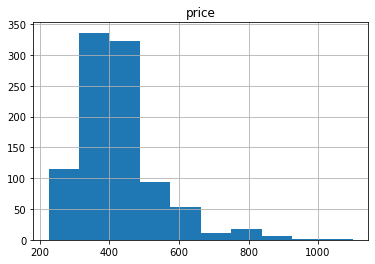

In [1631]:
df.hist("price")

In [1632]:
df["Extra per tenant"].value_counts().head(5)

€90/month     145
€100/month     44
€50/month      26
€150/month      9
€120/month      5
Name: Extra per tenant, dtype: int64

In [1633]:
df["Security deposit"].value_counts().head(5)

Equal to first rent    648
€597                    16
€631                    16
€620                    14
€647                    12
Name: Security deposit, dtype: int64

### Deposit columns

In [1634]:
df["Holding deposit"].value_counts()

0      958
€50      1
Name: Holding deposit, dtype: int64

In [1635]:
df["Security deposit"][df["Holding deposit"] != 0]

873    NaN
Name: Security deposit, dtype: object

There is only a non-zero value at "Holding deposit" and it is also the only missing value in "Security deposit". Holding and security in this context have the same meaning.

In [1636]:
df.loc[873, "Security deposit"] = df.loc[873, "Holding deposit"]
df = df.drop("Holding deposit", axis=1)

In [1637]:
col = "Security deposit"
df[col] = np.where(df[col].str.contains("to first rent") == True, 
                   df["price"], df[col].str.replace("€", ""))

df["deposit_minus_price"] = pd.to_numeric(df[col]) - df["price"]
df = df.drop(col, axis=1)

### Extra tenant columns
If missing it should be zero

In [1638]:
col = "Extra per tenant"
df[col] = df[col][df[col].notnull() == True].str.extract('(\d+)')
df[col] = df[col].fillna(0)

## Other rental conditions

They are availabilityStarts, Contract, Bills, Cancellation policy, Cleaning Frequency, Minimum stay.

In [1639]:
cols_rental = ["availabilityStarts", "Contract", "Bills", "Cancellation policy", 
               "Cleaning Frequency", "Minimum stay", "Admin fee", "Short term penalty",
              "Requirements"]

### "availabilityStarts"

In [1640]:
df[cols_rental[0]].value_counts().head(5)

Fri Jul 01 2022 00:00:00 GMT+0100    287
Wed Jan 12 2022 00:00:00 GMT+0000    255
Tue Feb 01 2022 00:00:00 GMT+0000    110
Tue Mar 01 2022 00:00:00 GMT+0000     72
Wed Jun 01 2022 00:00:00 GMT+0100     47
Name: availabilityStarts, dtype: int64

Data was scraped on January of 2022, so we will assume that any date of January 2022 corresponds to "available_immediately". Lets also change data type to datetime.

In [1641]:
df[cols_rental[0]] = df[cols_rental[0]].str.replace(" GMT\+0100", "")
df[cols_rental[0]] = df[cols_rental[0]].str.replace(" GMT\+0000", "")
df[cols_rental[0]] = pd.to_datetime(df[cols_rental[0]], format='%a %b %d %Y %H:%M:%S')

df["available_immediately"] = np.where((df[cols_rental[0]].dt.year == 2022) 
                                        & (df[cols_rental[0]].dt.month == 1), 1, 0) 

/var/folders/wx/q2279p3x3yn9gnd65ws15bvr0000gp/T/ipykernel_2692/2830978522.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df[cols_rental[0]] = df[cols_rental[0]].str.replace(" GMT\+0100", "")
/var/folders/wx/q2279p3x3yn9gnd65ws15bvr0000gp/T/ipykernel_2692/2830978522.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[cols_rental[0]] = df[cols_rental[0]].str.replace(" GMT\+0000", "")


### Other

In [1642]:
df[cols_rental[1]].value_counts()

Fortnightly    586
Monthly        370
Daily            3
Name: Contract, dtype: int64

In [1643]:
df[cols_rental[2]].value_counts()

Included         837
Some included     90
Not included      32
Name: Bills, dtype: int64

In [1644]:
df[cols_rental[3]].value_counts()

Moderate          941
Strict             14
Non-refundable      4
Name: Cancellation policy, dtype: int64

In [1645]:
df[cols_rental[4]].value_counts()

Weekly           598
None             186
Not specified    125
Monthly           28
Daily             12
Fortnightly       10
Name: Cleaning Frequency, dtype: int64

We will join "none" and "not specified" in column none.

In [1646]:
df[cols_rental[4]] = np.where(df[cols_rental[4]] == "None", "Not specified", df[cols_rental[4]])

In [1647]:
df[cols_rental[5]].value_counts().head(4)

27 nights     451
90 nights     147
118 nights     92
145 nights     68
Name: Minimum stay, dtype: int64

In [1648]:
df[cols_rental[5]] = df[cols_rental[5]][df[cols_rental[5]].notnull() == True].str.extract('(\d+)')
df = df.rename(columns = {cols_rental[5] : "min_stay_nights"})

In [1649]:
df[cols_rental[6]].value_counts()#.head(4)

€50/one-time fee     138
€28/one-time fee      10
€45/one-time fee       7
€40/one-time fee       7
€100/one-time fee      5
€25/one-time fee       3
€160/one-time fee      2
€74/one-time fee       1
€42/one-time fee       1
Name: Admin fee, dtype: int64

In [1650]:
df[cols_rental[6]] = df[cols_rental[6]][df[cols_rental[6]].notnull() == True].str.extract('(\d+)')
df[cols_rental[6]] = df[cols_rental[6]].fillna(0)
df = df.rename(columns = {cols_rental[6] : "one_time_fee"})

In [1651]:
df[cols_rental[7]].value_counts()#.head(4)

90 days     9
62 days     6
30 days     3
60 days     2
180 days    1
Name: Short term penalty, dtype: int64

In [1652]:
df[cols_rental[7]] = df[cols_rental[7]][df[cols_rental[7]].notnull() == True].str.extract('(\d+)')
df[cols_rental[7]] = df[cols_rental[7]].fillna(0)
df = df.rename(columns = {cols_rental[7] : "short_term_penalty_days"})

In [1653]:
df[cols_rental[8]].value_counts()#.head(4)

Offline ID          7
Renting contract    1
Name: Requirements, dtype: int64

Due to the scarce non null values and/or low diversity, from the abridged version the columns 
["Cancellation policy", "Short term penalty", "Requirements"] will be dropped.

## Change datatypes

cols_to_float should be numerical, while cols_to_int should be binary (0 or 1).

In [1654]:
len(cols_to_float) + len(cols_to_int)

82

In [1655]:
cols_to_float = ['price', 'Extra per tenant', 'one_time_fee', 'Floor_plan_m2', 
                 'Bedroom_area_m2', 'deposit_minus_price', 'n_thumbnails',
                 'min_stay_nights', 'short_term_penalty_days']

cols_to_int = ['rating', 'allows_Occasional overnight guests', 'allows_Pets', 'allows_Smoking',
               'Wardrobe', 'Desk', 'Chairs', 'Towels', 'Bed linen','Window', 'Sofa', 
               'Sofa bed', 'Balcony', 'Wi-Fi', 'Cable Tv', 'Central heating', 'Air conditioning', 
               'Outdoor area', 'Towels & bed linen', 'Elevator', 'Accessibility', 'Toilet', 'Sink', 
               'Shower', 'Bathtub', 'Fridge', 'Freezer', 'Stove', 'Oven', 'Microwave', 
               'Washing machine', 'Dishes & cutlery', 'Pots & pans', 'Coffee table', 'Table', 
               'Tv', 'Chest of drawers', 'Door lock', 'Dryer', 'Dishwasher', 
               'landlord_Female, 26-30 years old', 'landlord_Professional', 'landlord_Lives with family', 'landlord_Has pets', 
               'allows_Postgraduates', 'landlord_Female, 40+ years old', 
               'allows_Full-time employees','allows_Female only', 'allows_Undergraduates', 
               'allows_Domestic students', 'allows_Male only', 
               'allows_International students', 'landlord_Female, 18-25 years old',
               'landlord_Undergraduate student', 'landlord_Male, 31-40 years old',
               'landlord_Male, 40+ years old', 'Enclosed balcony', 'landlord_Female',
               'landlord_Female, 31-40 years old', 'landlord_Male',
               'landlord_Postgraduate student', 'landlord_Male, 18-25 years old','has_private_bathroom',
               'landlord_lives_here', 'has_tenant_restrictions',
               'available_immediately', 'n_people', 'n_Dining Rooms', 'n_Kitchens',
               'n_living_rooms', 'n_wcs', 'n_single_beds', 'n_double_beds', 'n_bedrooms', 'n_bathrooms']

For the cols_to_int it is best to fillna with 0.

In [1656]:
df = df.replace(to_replace='True', value=True)
df = df.replace(to_replace='False', value=False)

df[cols_to_int] = df[cols_to_int].fillna(0).astype(int)
df[cols_to_float] = df[cols_to_float].astype(float)

## Drop cols for abridged version

In [1658]:
df_abridged = df.copy()

In [1659]:
cols_to_drop = ['photo_url', 'availabilityStarts', "Cancellation policy", 'short_term_penalty_days', 
                "Requirements", "n_Dining Rooms", 'n_wcs', 'n_Kitchens'] 

df_abridged = df_abridged.drop(cols_landlord + cols_tenant_restrictions +
                               cols_to_drop, axis=1)

In [1660]:
df.to_csv("scraped_data/scrapping_cleaned_long.csv", index=True)
df_abridged.to_csv("scraped_data/scrapping_cleaned_abridged.csv", 
                   index=True)